In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score

# Use TensorFlow's integrated Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [6]:
df = pd.read_csv('Churn_Modelling.csv') # Replace with actual filename
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [8]:
# Label encode 'Gender'
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender']) # Male=1, Female=0
# One-hot encode 'Geography'
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [9]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [12]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification


In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32,validation_split=0.2)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7934 - loss: 0.5097 - val_accuracy: 0.7987 - val_loss: 0.4719
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7934 - loss: 0.4807 - val_accuracy: 0.7987 - val_loss: 0.4565
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7934 - loss: 0.4693 - val_accuracy: 0.7987 - val_loss: 0.4479
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7934 - loss: 0.4615 - val_accuracy: 0.7987 - val_loss: 0.4410
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7934 - loss: 0.4545 - val_accuracy: 0.7987 - val_loss: 0.4356
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7933 - loss: 0.4480 - val_accuracy: 0.7994 - val_loss: 0.4350
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7937 - loss: 0.4416 - val_accuracy: 0.8012 - val_loss: 0.4219
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7966 - loss: 0.4322 - val_accuracy: 0.

In [18]:
# Predict
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model Accuracy: 0.8575


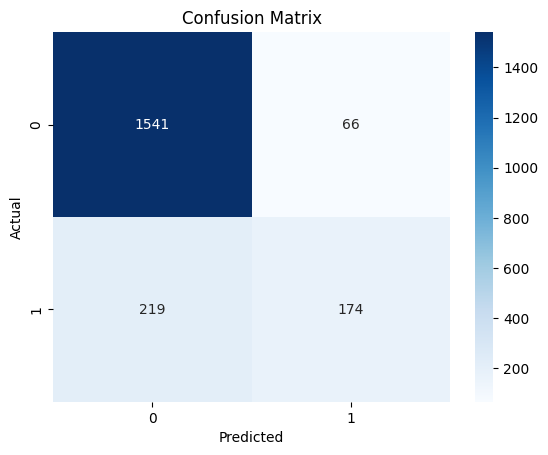

In [19]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()